In [1]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

全连接层定义函数

In [2]:
def fcn_layer(inputs,#输入数据
             input_dim, # 输入神经单元数量
             output_dim, # 输出神经单元数量
             activition=None): #激活函数
    W = tf.Variable(tf.truncated_normal([input_dim,output_dim], stddev=0.1))
    b = tf.Variable(tf.zeros([output_dim]))
    
    XWb = tf.matmul(inputs, W) + b
    
    if activition is None:
        output = XWb
    else:
        output = activition(XWb)
    
    return output

导入数据

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
print(mnist.train.images.shape,mnist.validation.images.shape,mnist.test.images.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784) (5000, 784) (10000, 784)


# 构建输入层
创建占位符

In [4]:
x = tf.placeholder(tf.float32,[None,784],name="X")
y = tf.placeholder(tf.float32,[None,10],name="Y")
print(x.shape,y.shape)

(?, 784) (?, 10)


# 构建隐藏层

In [5]:
H1_NN = 256
H2_NN = 128
H3_NN = 64

h1 = fcn_layer(x,784,H1_NN,tf.nn.relu)
h2 = fcn_layer(h1,H1_NN,H2_NN,tf.nn.relu)
h3 = fcn_layer(h2,H2_NN,H3_NN,tf.nn.relu)
forward = fcn_layer(h3,H3_NN,10,None)
pred = tf.nn.softmax(forward)

Instructions for updating:
Colocations handled automatically by placer.


## 定义损失函数：交叉熵

In [6]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=forward,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



定义训练超参数

In [7]:
train_epochs = 40
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
learning_rate = 0.01

选择优化器

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

定义准确率

In [9]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(pred,1))
accuray = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

全局初始化

In [10]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

训练

In [11]:
from time import time
start_time = time()
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x:xs, y:ys})
    
    # 使用验证集检验每个批次的训练成果
    # 验证集没有分批次
    loss,acc = sess.run([loss_function,accuray],feed_dict={
        x:mnist.validation.images,y:mnist.validation.labels
    })
    # 打印训练结果
    if (epoch+1) % display_step == 0:
        print("train epoch:",(epoch + 1),"Loss:",loss,"Accuracy:",acc)

print("Train finished, takes:",time() - start_time)

train epoch: 1 Loss: 0.16145469 Accuracy: 0.9536
train epoch: 2 Loss: 0.11102935 Accuracy: 0.9682
train epoch: 3 Loss: 0.11842952 Accuracy: 0.9692
train epoch: 4 Loss: 0.14243679 Accuracy: 0.9668
train epoch: 5 Loss: 0.12032766 Accuracy: 0.9694
train epoch: 6 Loss: 0.12806472 Accuracy: 0.9726
train epoch: 7 Loss: 0.14110889 Accuracy: 0.9724
train epoch: 8 Loss: 0.15269753 Accuracy: 0.9728
train epoch: 9 Loss: 0.16194558 Accuracy: 0.9668
train epoch: 10 Loss: 0.12888066 Accuracy: 0.9716
train epoch: 11 Loss: 0.1072899 Accuracy: 0.977
train epoch: 12 Loss: 0.17875749 Accuracy: 0.9748
train epoch: 13 Loss: 0.1700137 Accuracy: 0.9722
train epoch: 14 Loss: 0.15578769 Accuracy: 0.9736
train epoch: 15 Loss: 0.17512745 Accuracy: 0.975
train epoch: 16 Loss: 0.1306372 Accuracy: 0.9752
train epoch: 17 Loss: 0.19793542 Accuracy: 0.9672
train epoch: 18 Loss: 0.19137447 Accuracy: 0.9678
train epoch: 19 Loss: 0.1642 Accuracy: 0.9746
train epoch: 20 Loss: 0.16944663 Accuracy: 0.9732
train epoch: 21 Lo

使用验证数据集验证训练结果

In [12]:
 acc_validation = sess.run([accuray],feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
print("valication accuracy:",acc_validation)

valication accuracy: [0.979]


使用测试数据集验证训练结果

In [13]:
 test_validation = sess.run([accuray],feed_dict={x:mnist.test.images,y:mnist.test.labels})
print("test accuracy:",test_validation)

test accuracy: [0.9773]


模型应用

In [14]:
prediction_result = sess.run(tf.argmax(pred,1),feed_dict={x:mnist.test.images})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

可视化预测结果

<IPython.core.display.Javascript object>


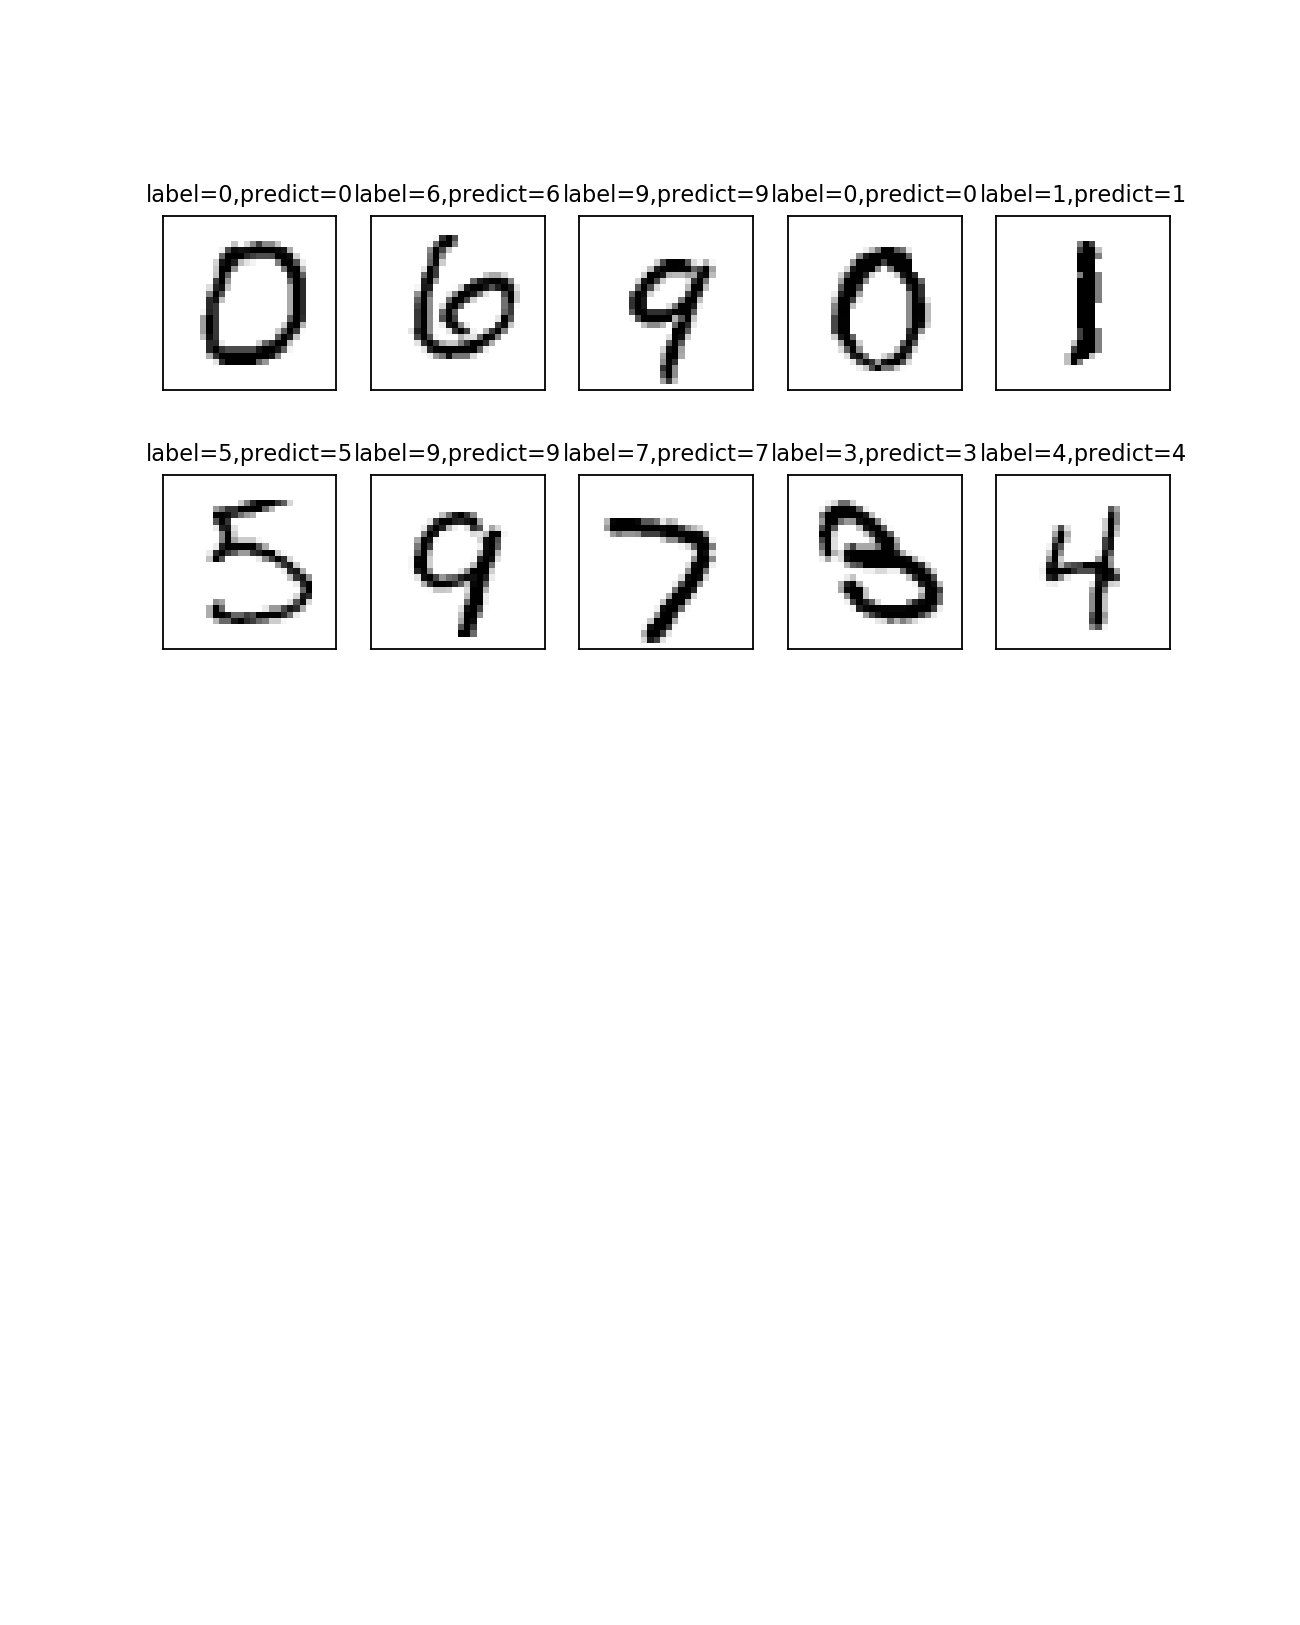

In [15]:
def plot_images_labels_prediction(images, # 图像列表
                                 labels, # 标签列表
                                 prediction, # 预测列表
                                 index, # 从index开始显示
                                 num=10): # 缺省一次显示10个
    fig = plt.gcf()
    fig.set_size_inches(8,10)
    if num>25:
        num = 25
    
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(np.reshape(images[index],(28,28)),cmap="binary")
        title="label=" + str(np.argmax(labels[index]))
        if len(prediction)>0:
            title+= ",predict=" + str(prediction[index])
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction_result,10,10)

找出预测错误的样本

In [16]:
compare_list = prediction_result == np.argmax(mnist.test.labels,1)
print(compare_list)

[ True  True  True ...  True  True  True]


In [17]:
err_list = [i for i in range(len(compare_list)) if compare_list[i] == False]
print(err_list,len(err_list))

[33, 115, 149, 175, 247, 259, 321, 445, 449, 495, 578, 582, 619, 691, 717, 720, 740, 839, 844, 846, 883, 900, 936, 947, 951, 956, 965, 1014, 1039, 1082, 1107, 1112, 1156, 1173, 1181, 1200, 1226, 1232, 1247, 1260, 1299, 1319, 1326, 1328, 1393, 1394, 1422, 1444, 1494, 1527, 1530, 1549, 1553, 1570, 1609, 1621, 1626, 1640, 1678, 1681, 1717, 1737, 1751, 1754, 1790, 1800, 1828, 1878, 1901, 1941, 1968, 2018, 2070, 2093, 2109, 2118, 2130, 2135, 2182, 2266, 2272, 2291, 2326, 2369, 2371, 2387, 2422, 2433, 2488, 2560, 2578, 2597, 2607, 2648, 2654, 2721, 2863, 2896, 2921, 2927, 2939, 2953, 2975, 2995, 3023, 3030, 3073, 3117, 3218, 3225, 3503, 3549, 3550, 3558, 3559, 3567, 3727, 3751, 3767, 3780, 3808, 3811, 3817, 3853, 3893, 3902, 3906, 3941, 3943, 3951, 3961, 4065, 4078, 4163, 4176, 4201, 4205, 4248, 4289, 4306, 4359, 4497, 4536, 4551, 4567, 4571, 4575, 4601, 4639, 4690, 4740, 4807, 4814, 4823, 4833, 4837, 4860, 4880, 4956, 4966, 5086, 5201, 5331, 5457, 5600, 5623, 5642, 5654, 5676, 5734, 5749, 5

In [18]:
def print_pred_errs(labels, # 标签列表
                         prediction):# 预测值列表
    count = 0
    for x in err_list:
        print("index:",x,"标签值：",np.argmax(labels[x]),"预测值：",prediction[x])
        count += 1
        
print_pred_errs(labels=mnist.test.labels,prediction=prediction_result)   

index: 33 标签值： 4 预测值： 8
index: 115 标签值： 4 预测值： 8
index: 149 标签值： 2 预测值： 3
index: 175 标签值： 7 预测值： 8
index: 247 标签值： 4 预测值： 2
index: 259 标签值： 6 预测值： 8
index: 321 标签值： 2 预测值： 7
index: 445 标签值： 6 预测值： 0
index: 449 标签值： 3 预测值： 8
index: 495 标签值： 8 预测值： 0
index: 578 标签值： 3 预测值： 7
index: 582 标签值： 8 预测值： 2
index: 619 标签值： 1 预测值： 8
index: 691 标签值： 8 预测值： 4
index: 717 标签值： 0 预测值： 8
index: 720 标签值： 5 预测值： 8
index: 740 标签值： 4 预测值： 9
index: 839 标签值： 8 预测值： 3
index: 844 标签值： 8 预测值： 7
index: 846 标签值： 7 预测值： 8
index: 883 标签值： 3 预测值： 5
index: 900 标签值： 1 预测值： 8
index: 936 标签值： 8 预测值： 5
index: 947 标签值： 8 预测值： 9
index: 951 标签值： 5 预测值： 4
index: 956 标签值： 1 预测值： 7
index: 965 标签值： 6 预测值： 5
index: 1014 标签值： 6 预测值： 5
index: 1039 标签值： 7 预测值： 8
index: 1082 标签值： 5 预测值： 3
index: 1107 标签值： 9 预测值： 3
index: 1112 标签值： 4 预测值： 6
index: 1156 标签值： 7 预测值： 2
index: 1173 标签值： 7 预测值： 9
index: 1181 标签值： 6 预测值： 8
index: 1200 标签值： 8 预测值： 3
index: 1226 标签值： 7 预测值： 2
index: 1232 标签值： 9 预测值： 4
index: 1247 标签值： 9 预测值： 2
index: 1260 标签